# Hunting Exoplanets In Space - Visualizating the Data

We will create **scatter plots** and **line plots** to visualise the fluctuations in the brightness levels (or flux values) of the light emitted by the stars.

- If there is a periodic dip in the brightness levels, then we can say that the star has at least one planet. This star is labelled as `2`.

-  If there is no clear periodic dip in the brightness levels, then we could say that the star has no planet. In the datasets, such stars are labelled as `1`.

The `exo_train_df` has 5087 rows and 3198 columns. Each row denotes a star. The `LABEL` column tells the label or the classification of the star, i.e., whether it has at least one planet or at most one planet. The remaining 3197 columns, i.e., the columns `FLUX.1` to `FLUX.3197` contain the brightness levels for each star. A brightness level is a floating-point value which could be either positive, negative or zero. *For the time being, do not worry about the negative brightness levels.*

We will create the scatter plots and line plots for three stars labelled as `2` and three stars labelled as `1`.

---

#### Loading The Training Dataset

Dataset links:

1. Train dataset
   
   https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/kepler-exoplanets-dataset/exoTrain.csv

2. Test dataset
   
   https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/kepler-exoplanets-dataset/exoTest.csv

In [2]:
# Load the training dataset.
import pandas as pd
exo_train_df = pd.read_csv("exoTrain.csv")

---

#### Scatter and Line Plots

Let's plot scatter plots and line plots for the exo_train_df DataFrame.

To create this visualization, we first need to import the matplotlib.pyplot module, commonly used for creating various types of graphs such as bar graphs, histograms, line plots, and scatter plots. We import it with the alias plt for convenience.

Additionally, we use the Seaborn library, which is built on top of Matplotlib and provides a more visually appealing and informative way to create statistical graphics. Seaborn makes it easy to generate complex visualizations with less code while offering built-in themes, color palettes, and enhanced support for multi-dimensional data.

By combining Matplotlib and Seaborn, we can create high-quality, visually appealing scatter and line plots to analyze planetary data effectively.


-------------------------Star 1-------------------------



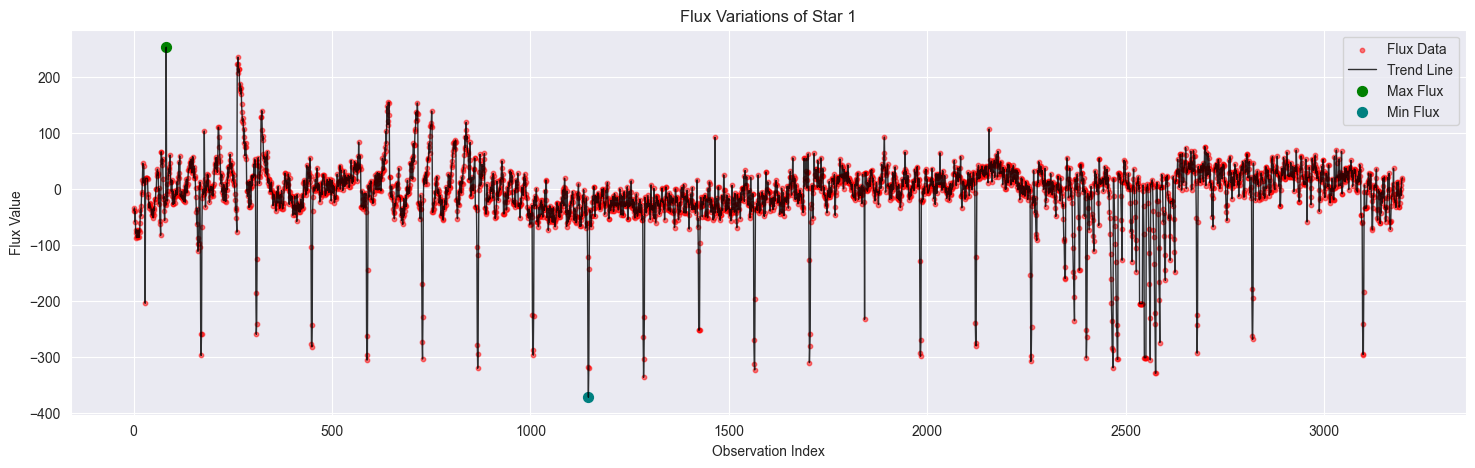


Star 1 - Max Flux: 252.64, Min Flux: -371.27, Label: 2.0

Star 1 Have Planets


-------------------------Star 2-------------------------



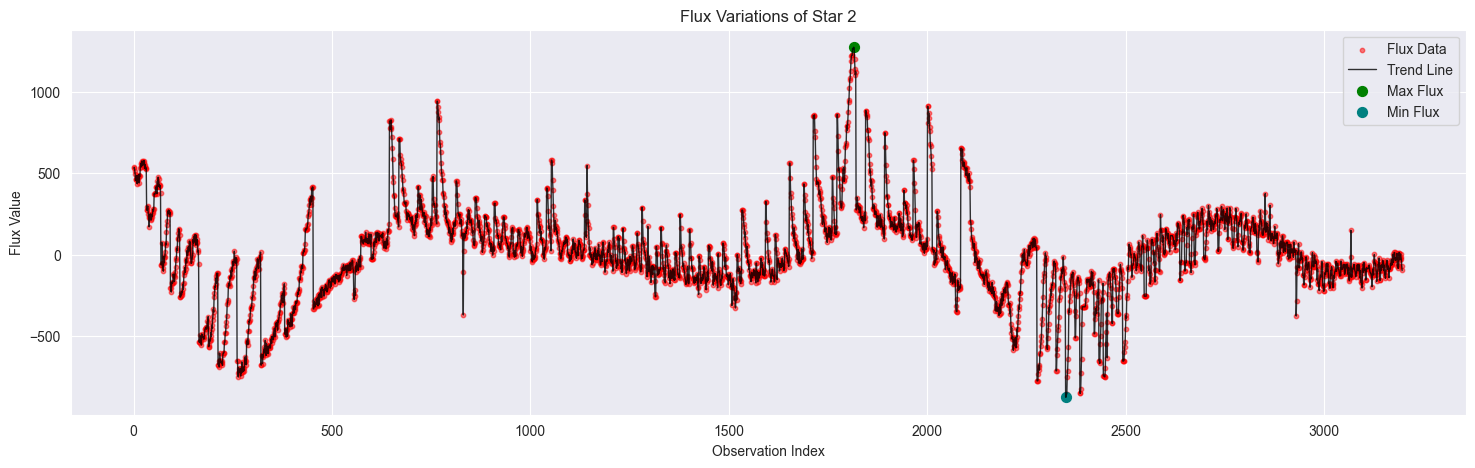


Star 2 - Max Flux: 1274.59, Min Flux: -874.95, Label: 2.0

Star 2 Have Planets


-------------------------Star 3-------------------------



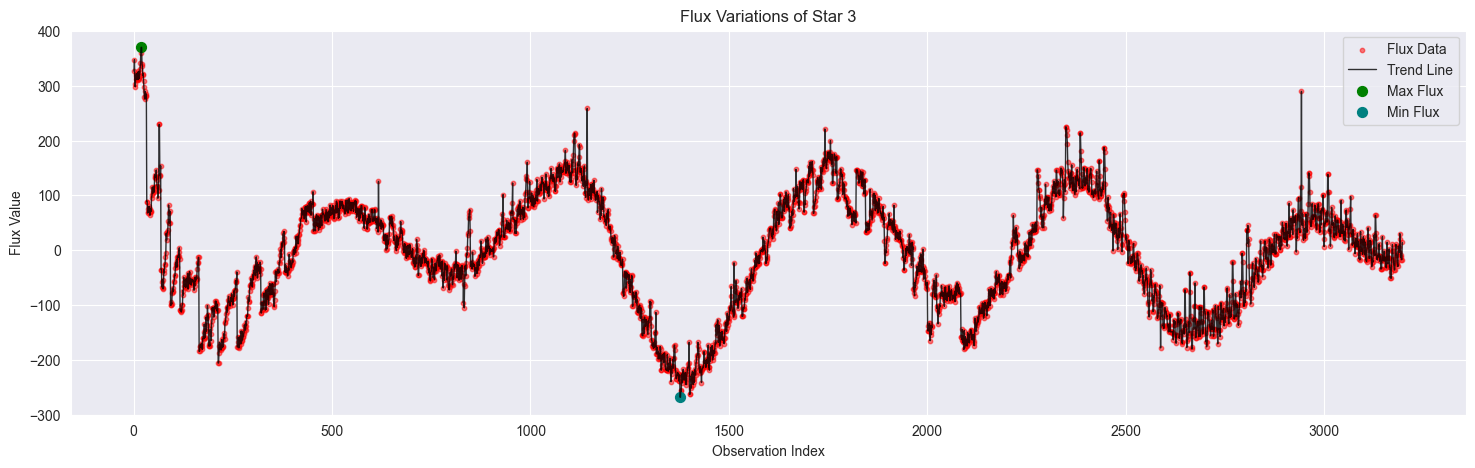


Star 3 - Max Flux: 370.29, Min Flux: -268.41, Label: 2.0

Star 3 Have Planets


-------------------------Star 5084-------------------------



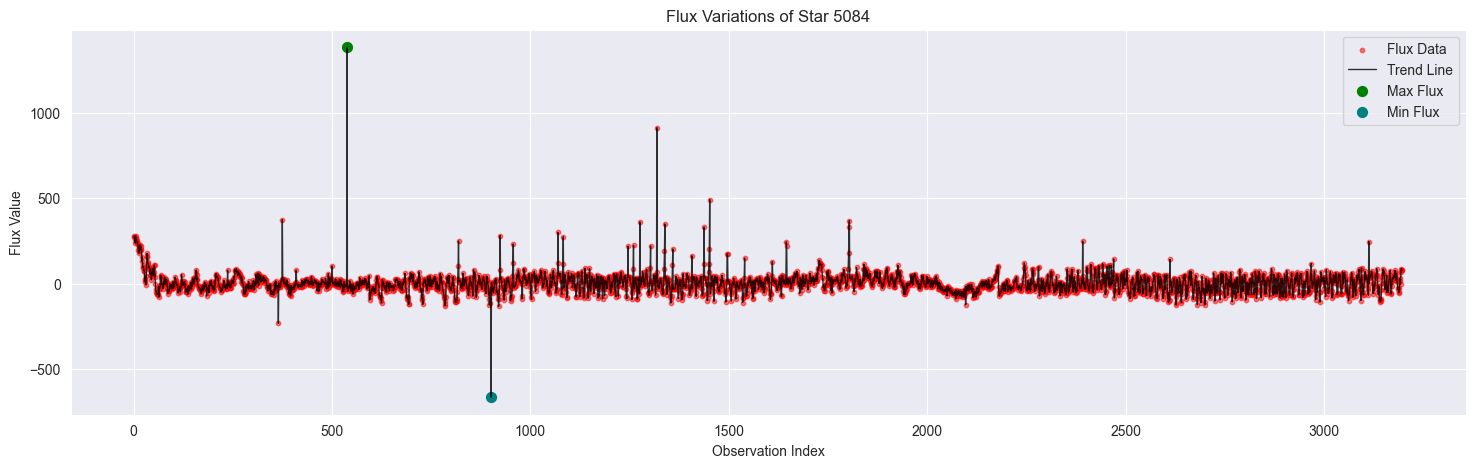


Star 5084 - Max Flux: 1383.85000000001, Min Flux: -664.929999999993, Label: 1.0

Star 5084 Do not have Planets


-------------------------Star 5085-------------------------



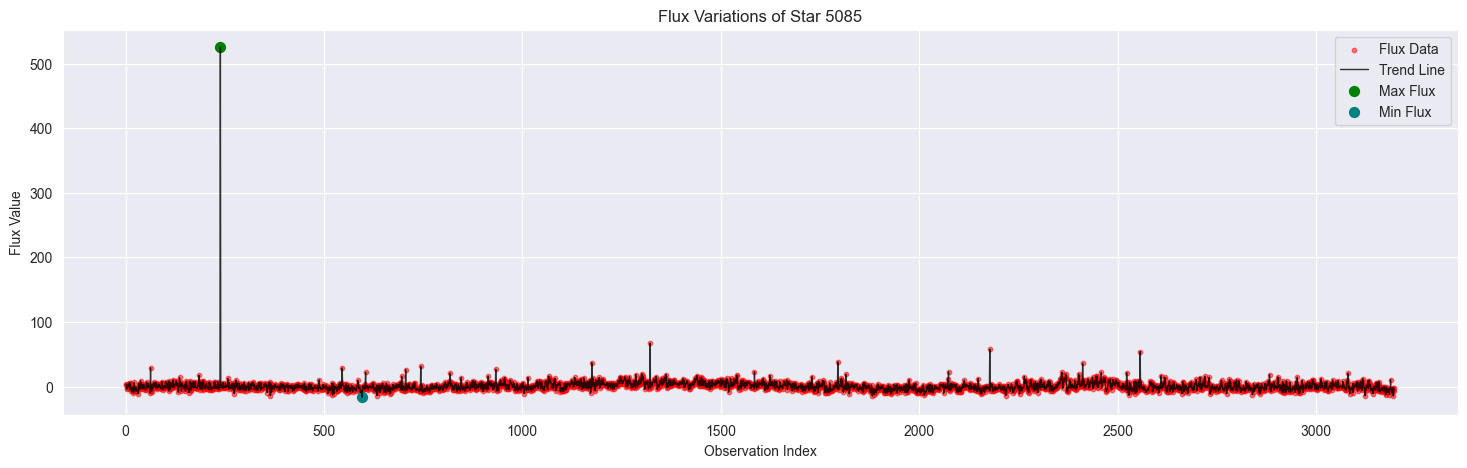


Star 5085 - Max Flux: 525.23, Min Flux: -16.41, Label: 1.0

Star 5085 Do not have Planets


-------------------------Star 5086-------------------------



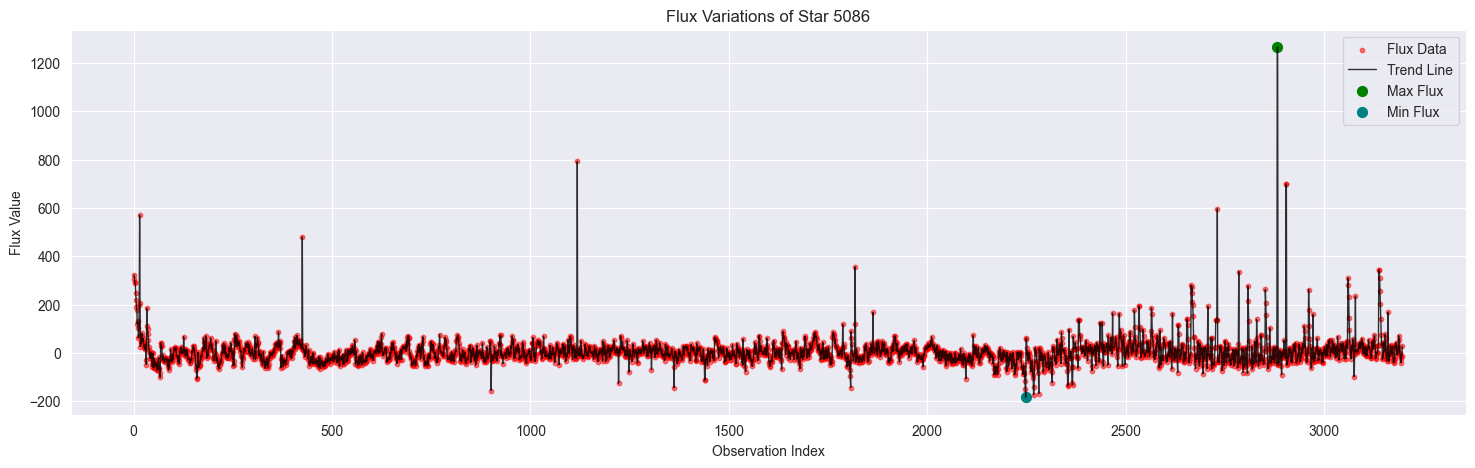


Star 5086 - Max Flux: 1264.26000000001, Min Flux: -182.800000000003, Label: 1.0

Star 5086 Do not have Planets



In [25]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set Seaborn style for better visualization
sns.set_style("darkgrid")

# Define selected stars
stars = {
    "Star 1": exo_train_df.iloc[1, :],
    "Star 2": exo_train_df.iloc[2, :],
    "Star 3": exo_train_df.iloc[3, :],
    "Star 5084": exo_train_df.iloc[5084, :],
    "Star 5085": exo_train_df.iloc[5085, :],
    "Star 5086": exo_train_df.iloc[5086, :]
}

# Generate x-values
x_values = np.arange(1, len(stars["Star 1"]))

# Iterate through each star and generate individual plots
for star_name, flux_values in stars.items():
    y_values = flux_values[1:]
    max_flux = y_values.max()
    min_flux = y_values.min()
    acutal_label = flux_values.iloc[0]

    plt.figure(figsize=(18, 5), dpi=100)

    print(f"\n{"-"*25}{star_name}{"-"*25}\n")

    # Scatter plot and line plot overlay
    plt.scatter(x_values, y_values, alpha=0.5, label="Flux Data", color="red", s=10)
    plt.plot(x_values, y_values, color="black", linewidth=1, label="Trend Line",alpha = 0.8)

    # Highlight max and min points
    plt.scatter(x_values[y_values.argmax()], max_flux, color="green", marker="o", s=50, label="Max Flux")
    plt.scatter(x_values[y_values.argmin()], min_flux, color="teal", marker="o", s=50, label="Min Flux")

    # Labels and title
    plt.xlabel("Observation Index")
    plt.ylabel("Flux Value")
    plt.title(f"Flux Variations of {star_name}")
    plt.legend()

    # Show the plot for each star
    plt.show()

    # Print max and min values
    print(f"\n{star_name} - Max Flux: {max_flux}, Min Flux: {min_flux}, Label: {acutal_label}")
    print(f"\n{star_name} {"Have Planets" if acutal_label == 2 else "Do not have Planets"}\n")


---

#### Results

The visual analysis of flux variations highlights a clear distinction between the two groups of stars. The first three stars exhibit periodic dips, a strong indicator of planetary transits, suggesting the presence of orbiting exoplanets. In contrast, the last three stars display irregular and random fluctuations, making it unlikely that they host planets.

This hypothesis is further validated by their actual classification labels, confirming that the first three stars are indeed exoplanet candidates, while the last three are not. While visual inspection provides an initial indication, definitive confirmation requires advanced statistical methods, such as transit detection algorithms and time-series modeling, to rule out stellar variability or instrumental noise.

---